In [1]:
# Load libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print(gym.__file__)

In [3]:
# Load the gym environment (Inverted pendulum - Swing-up problem)
env = gym.make("Pendulum-v1", g=9.81, render_mode="rgb_array")

# General information about the environment
envs = gym.envs.registry
print(envs["Pendulum-v1"])

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

EnvSpec(id='Pendulum-v1', entry_point='gym.envs.classic_control.pendulum:PendulumEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='Pendulum', version=1)
Observation space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action space: Box(-2.0, 2.0, (1,), float32)


### Observation and action space
The observation is a ndarray with shape (3,) representing the x-y coordinates of the pendulum’s free end and its angular velocity.

obs[0]: x = cos(theta) --> [-1, 1], obs[1]: y = sin(theta) --> [-1, 1], obs[2]: Angular velocity --> [-8, 8]

![Problem schematic](../pendulum.png)

The action is a ndarray with shape (1,) representing the torque applied to free end of the pendulum.
T: A continious torque within the range of [-2, 2] (N.m)

Our first observation: [-0.14995256  0.9886932  -0.12224312]


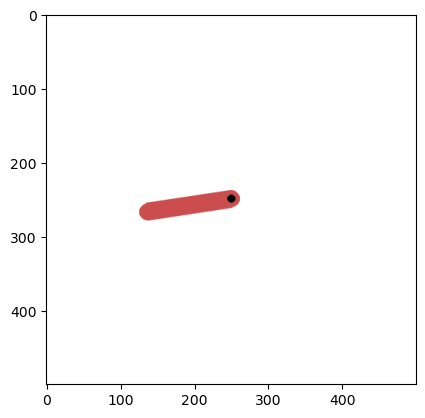

In [4]:
# Initialize the environment with a random seed
obs, info = env.reset(seed=42)
print('Our first observation:', obs)
img = env.render()
plt.imshow(img);

### Costumized Initialization
In order to initialize the state of the pendulum, especially its angle, minor changes are applied to the reset funciton, which was defined previously in the pendulum class.

In the modified version of the reset function, the initial angle of pendulum is either within the range of $[\frac{3\pi}{4}, \pi]$ or $[-\pi, \frac{-3\pi}{4}]$ (see the first figure).

In the original version, the initial angle and angular velocity is randomly and uniformly choosed within the default range or the provided range by the user.

In this modifed version, the initial angle is first randomly and uniformly picked within the above-mentioned range, then it is given to the reset function, and this function will not change its value.

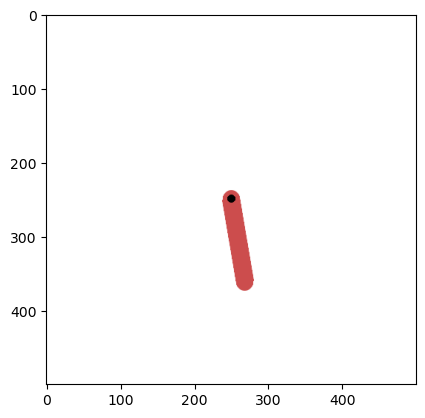

In [5]:
# Test: Costumized initialization (third and fourth quadrant)
theta_initial = np.random.uniform(low=-np.pi/6, high=np.pi/6)
initial_theta_dot = np.random.uniform(low=-1, high = 1)

# This condition ensures that theta falls with the above-mentioned range 
# based on the definition of the normalized angle and the coordinate system in first figure above.
if theta_initial<0:
    theta_initial = np.pi + theta_initial
else:
    theta_initial = -(np.pi - theta_initial)

options = {
    "x_init": theta_initial,  # or 0 for test
    "y_init": initial_theta_dot  # or 0 for test
}

observation, info = env.reset(options=options)
img = env.render()
plt.imshow(img);

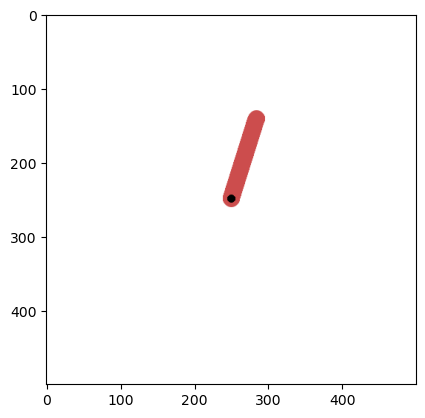

In [6]:
# Test: Costumized initialization (first and second quadrant)
theta_initial = np.random.uniform(low=-np.pi/6, high=np.pi/6)
initial_theta_dot = np.random.uniform(low=-1, high = 1)

options = {
    "x_init": theta_initial,  # or 0 for test
    "y_init": initial_theta_dot  # or 0 for test
}

observation, info = env.reset(options=options)
img = env.render()
plt.imshow(img);

[ 0.9453653  -0.32601303 -0.54216635] -0.09705473851954047 False False {}
Theta angle (deg) =  -19.026958716194777


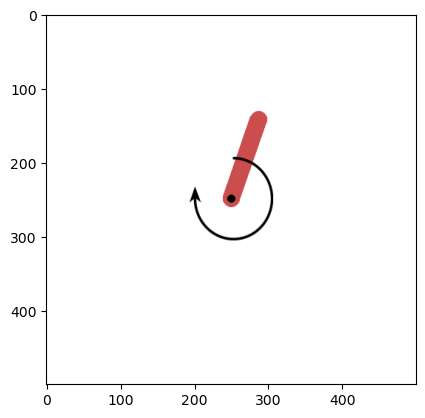

In [7]:
# Test: Applying single random actions and visulize its effects
action = np.array([-2])  # CCW torqu
obs, reward, done, truncated, info = env.step(action)
print(obs, reward, done, truncated, info)
print('Theta angle (deg) = ', np.arctan2(obs[1], obs[0]) * 180/np.pi)
img = env.render()
plt.imshow(img);

### How to apply these changes to the source code!

Run this code: `print(gym.__file__)` and open the pendulum.py file.
Then, replace the following commented code with the `reset` function.

In [8]:
'''
def reset(self, *, seed: Optional[int] = None, options: Optional[dict] = None):
        super().reset(seed=seed)
        if options is None:
            high = np.array([DEFAULT_X, DEFAULT_Y])
            low = -high  # We enforce symmetric limits.
            self.state = self.np_random.uniform(low=low, high=high)
            self.last_u = None
        else:
            # Note that if you use custom reset bounds, it may lead to out-of-bound
            # state/observations.
            x = options.get("x_init") if "x_init" in options else DEFAULT_X
            y = options.get("y_init") if "y_init" in options else DEFAULT_Y
            x = utils.verify_number_and_cast(x)
            y = utils.verify_number_and_cast(y)
            self.state = np.array([x, y])
            self.last_u = None

        if self.render_mode == "human":
            self.render()
        return self._get_obs(), {}
''';

### Random Action Results

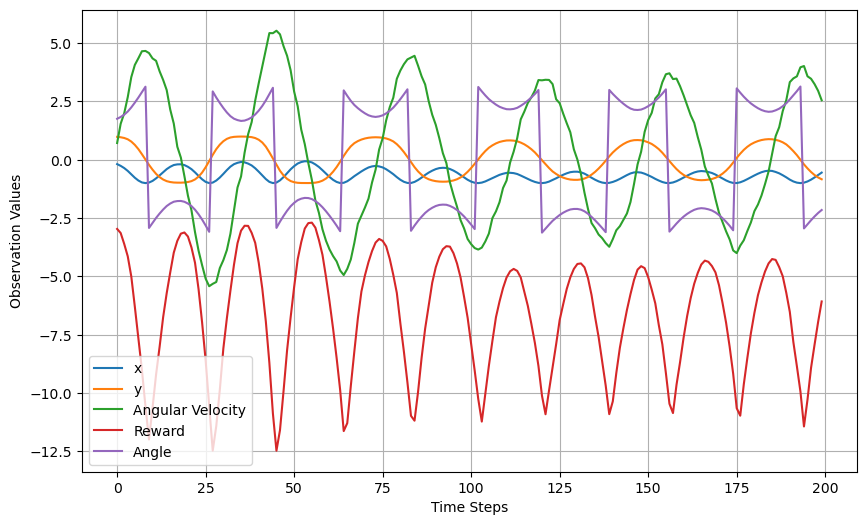

In [9]:
# Perform random actions

# Lists to store the observations
x_coordinate_values = []
y_coordinate_values = []
angular_velocity = []
action_values = []
reward_values = []
angle_deg_values = []
angle_rad_values = []

# Initialize the environment before the begining of the episode
initial_observation = env.reset(seed=42)

# Change the number of time steps per episode; the default number is 200
# env._max_episode_steps = 500


for _ in range(env._max_episode_steps):
    # Random action and its observation
    random_action = env.action_space.sample()
    observation, reward, _, _, _ = env.step(random_action)
    
    # Calculate the theta
    theta_rad = np.arctan2(observation[1], observation[0])
    theta_deg = np.degrees(theta_rad)
    
    # Record the actions and observations
    action_values.append(random_action)
    x_coordinate_values.append(observation[0])
    y_coordinate_values.append(observation[1])
    angular_velocity.append(observation[2])
    reward_values.append(reward)
    angle_rad_values.append(theta_rad)
    angle_deg_values.append(theta_deg)
    
time_steps = np.arange(env._max_episode_steps)

plt.figure(figsize=(10, 6))

plt.plot(time_steps, x_coordinate_values, label='x')
plt.plot(time_steps, y_coordinate_values, label='y')
plt.plot(time_steps, angular_velocity, label='Angular Velocity')
# plt.plot(time_steps, action_values, label='Applied Torque')
plt.plot(time_steps, reward_values, label='Reward')
plt.plot(time_steps, angle_rad_values, label='Angle')

plt.xlabel('Time Steps')
plt.ylabel('Observation Values')
plt.legend()
plt.grid(True)
plt.show()


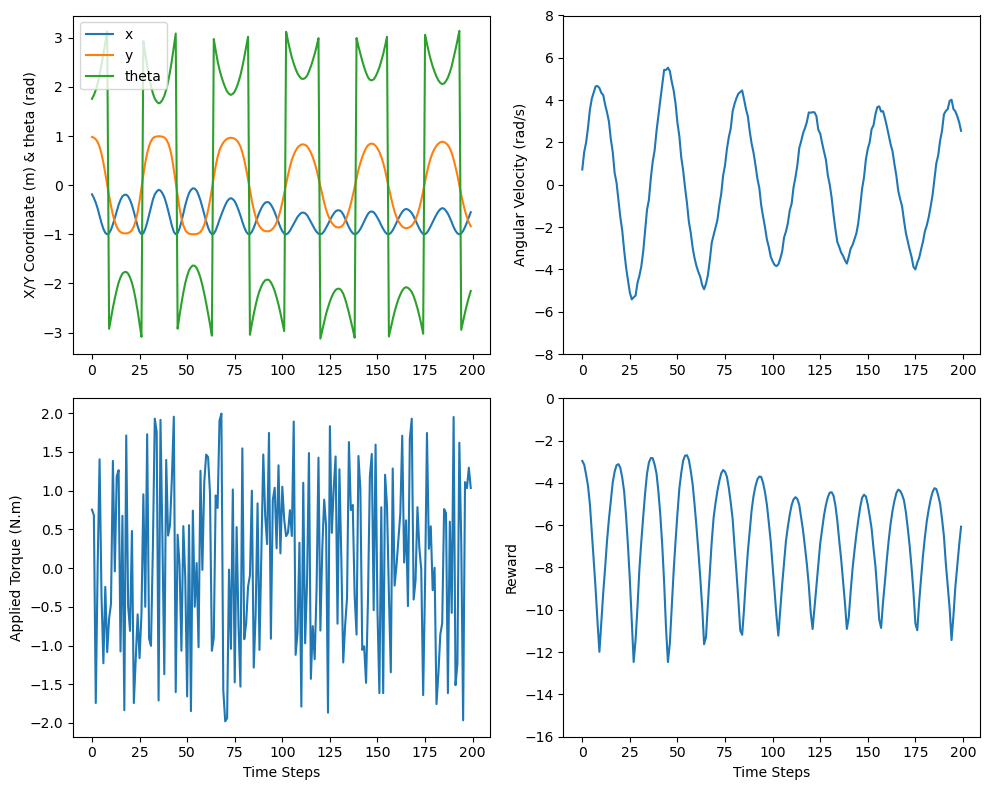

In [10]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

axs[0].plot(time_steps, x_coordinate_values, label='x')
axs[0].plot(time_steps, y_coordinate_values, label='y')
axs[0].plot(time_steps, angle_rad_values, label='theta')
axs[0].set_ylabel('X/Y Coordinate (m) & theta (rad)')
axs[0].legend()

axs[1].plot(time_steps, angular_velocity)
axs[1].set_ylabel('Angular Velocity (rad/s)')
axs[1].set_ylim([-8, 8])

axs[2].plot(time_steps, action_values)
axs[2].set_ylabel('Applied Torque (N.m)')
axs[2].set_xlabel('Time Steps')

axs[3].plot(time_steps, reward_values)
axs[3].set_ylabel('Reward')
axs[3].set_xlabel('Time Steps')
axs[3].set_ylim([-16, 0])

plt.tight_layout()
plt.show()

### Reward equation
$r = -(\theta^2 + 0.1 \times {\dot{\theta}}^2 + 0.001 \times torque^2)$

where $\theta$ is the pendulum’s angle normalized between $[-\pi, \pi]$ (with 0 being in the upright position). Based on the above equation, the minimum reward that can be obtained is $-(\pi^2 + 0.1 \times 8^2 + 0.001 \times 2^2) = -16.2736044$, while the maximum reward is zero (pendulum is upright with zero velocity and no torque applied).

### Linear Q-Learning + $\epsilon$-greedy Policy

In [11]:
# Extract features
def get_features(state, action):
    x, y, th_dot = state  # th_dot: theta_dot
    th = np.arctan2(y, x)  # th: theta
    torque = action[0]
    
    features = np.array([th, th_dot, torque,
                         th**2, th_dot**2, torque*th_dot])
    return features

# Approximate the Q-value (Linear)
def q_function(state, action, w):
    x = get_features(state, action)
    output = np.dot(x, w)
    return output

# Select an action that maximize the q value (Greedy action)
def get_action_greedy(state, w):
     # Discretize the action
    discrete_actions= np.linspace(env.action_space.low[0], env.action_space.high[0], 101)
    qs = []
    qs = [q_function(state, np.array([action]), w) for action in discrete_actions]
    max_index = np.argmax(qs)
    action = discrete_actions[max_index]
    return np.array([action])

# Epsilon-Greedy policy to select the next action
def get_action_epsilon_greedy(state, w, epsilon):
    discrete_actions= np.linspace(env.action_space.low[0], env.action_space.high[0], 101)
    if np.random.rand() < epsilon:
        # Exploration by selecting a random action with a probability of epsilon
        action = np.random.choice(discrete_actions)
    else:
        # Exploitation by selecting an action with the highest immediate reward
        qs = [q_function(state, np.array([action]), w) for action in discrete_actions]
        max_index = np.argmax(qs)
        action = discrete_actions[max_index]
    return np.array([action])

In [ ]:
# Learning parameters
learning_rate = 1e-6  # alpha or the learning rate for the SGD optimiation of weights
discount_factor = 0.99  # gamma or the discount factor for the Q-Learning

# Epsilon-greedy parameters
epsilon = 0.9
epsilon_decay = 0.992
epsilon_min = 0.005

# Initialize the weights
w = np.random.uniform(low=-0.1, high=0.1, size=(get_features(env.reset()[0], np.array([0.])).shape[0],))

# Loop parameters
num_episode = 2000
env._max_episode_steps = 600
num_time_steps = env._max_episode_steps

# Pre-allocation
x_coordinate_values = np.zeros([num_episode, num_time_steps])
y_coordinate_values = np.zeros([num_episode, num_time_steps])
th_values = np.zeros([num_episode, num_time_steps])
th_dot_values = np.zeros([num_episode, num_time_steps])
action_values = np.zeros([num_episode, num_time_steps])
reward_values = np.zeros([num_episode, num_time_steps])
weight_values = np.zeros([num_episode, num_time_steps, len(w)])
td_error_values = np.zeros([num_episode, num_time_steps])
epsilon_values = np.zeros([num_episode])

for episode in range(num_episode):
    total_reward = 0  # Reset the total reward
    
    # Initialize the theta and theta_dot (Pendulum is in the first and second quadrant)
    initial_theta_dot = np.random.uniform(low=-0.1, high = 0.1)
    theta_initial = np.random.uniform(low=-np.pi/6, high=np.pi/6)
    
    # This condition is used for initializing the pendulum in third and fourth quadrant
    '''
    if theta_initial<0:
        theta_initial = np.pi + theta_initial
    else:
        theta_initial = -(np.pi - theta_initial)
    '''

    options = {
        "x_init": theta_initial,  # 0,
        "y_init": initial_theta_dot  # 0
    }

    s, _ = env.reset(options=options)  # Initialize the environment
    
    for time_step in range(num_time_steps):
        env.render()  # For visualization
        
        # Store the x and y coordinates and angular velocity
        x_coordinate_values[episode, time_step] = s[0]
        y_coordinate_values[episode, time_step] = s[1]
        th_values[episode, time_step] = np.arctan2(s[1], s[0]) * 180/np.pi
        th_dot_values[episode, time_step] = s[2]
        
        # Select the current action
        a = get_action_epsilon_greedy(s, w, epsilon)
        
        # Take the current action, observe the new state (s'), and calculate the immediate reward (r')
        s_prime, r_prime, done, truncated, info = env.step(a)
        
        # Select the greedy action
        a_maximizer_q = get_action_greedy(s_prime, w)
        
        # Calculate the q values
        q_current = q_function(s, a, w)
        q_maximized = q_function(s_prime, a_maximizer_q, w)

        # Calculate and store the temporal difference error
        td_error = (r_prime + (discount_factor * q_maximized)) - q_current
        td_error_values[episode, time_step] = td_error
        
        # Obtain the features
        features = get_features(s, a)
        
        # Store the weights
        weight_values[episode, time_step, :] = w
        
        # Update the weights (SGD)
        w = w + learning_rate * td_error * features
        
        # Update the current state
        s = s_prime
        
        # Store the current action (a)
        action_values[episode, time_step] = a[0]
        
        # Store the rewards
        reward_values[episode, time_step] = r_prime
        
        if time_step%30 == 0:
           print(f'Episode: {episode}, Time step: {time_step}')
        
        # Store and update the epsilon value (Multiplicative Decay)
        epsilon = max(epsilon_min, epsilon*epsilon_decay)
    
    # Reset the epsilon value
    epsilon = 0.9

env.close()

np.save('x_coordinate_values.npy', x_coordinate_values)
np.save('y_coordinate_values.npy', y_coordinate_values)
np.save('th_values.npy', th_values)
np.save('th_dot_values.npy', th_dot_values)
np.save('action_values.npy', action_values)
np.save('reward_values.npy', reward_values)
np.save('weight_values.npy', weight_values)
np.save('td_error_values.npy', td_error_values)
np.save('epsilon_values.npy', epsilon_values)
np.save('num_episode.npy', num_episode)
np.save('num_time_steps.npy', num_time_steps)

Episode: 0, Time step: 0
Episode: 0, Time step: 30
Episode: 0, Time step: 60
Episode: 0, Time step: 90
Episode: 0, Time step: 120
Episode: 0, Time step: 150
Episode: 0, Time step: 180
Episode: 0, Time step: 210
Episode: 0, Time step: 240
Episode: 0, Time step: 270
Episode: 0, Time step: 300
Episode: 0, Time step: 330
Episode: 0, Time step: 360
Episode: 0, Time step: 390
Episode: 0, Time step: 420
Episode: 0, Time step: 450
Episode: 0, Time step: 480
Episode: 0, Time step: 510
Episode: 0, Time step: 540
Episode: 0, Time step: 570
Episode: 1, Time step: 0
Episode: 1, Time step: 30
Episode: 1, Time step: 60
Episode: 1, Time step: 90
Episode: 1, Time step: 120
Episode: 1, Time step: 150
Episode: 1, Time step: 180
Episode: 1, Time step: 210
Episode: 1, Time step: 240
Episode: 1, Time step: 270
Episode: 1, Time step: 300
Episode: 1, Time step: 330
Episode: 1, Time step: 360
Episode: 1, Time step: 390
Episode: 1, Time step: 420
Episode: 1, Time step: 450
Episode: 1, Time step: 480
Episode: 1,

In [12]:
# Load the results
x_coordinate_values = np.load('x_coordinate_values.npy')
y_coordinate_values = np.load('y_coordinate_values.npy')
th_values = np.load('th_values.npy')
th_dot_values = np.load('th_dot_values.npy')
action_values = np.load('action_values.npy')
reward_values = np.load('reward_values.npy')
weight_values = np.load('weight_values.npy')
td_error_values = np.load('td_error_values.npy')
epsilon_values = np.load('epsilon_values.npy')
num_episode = np.load('num_episode.npy')
num_time_steps = np.load('num_time_steps.npy')

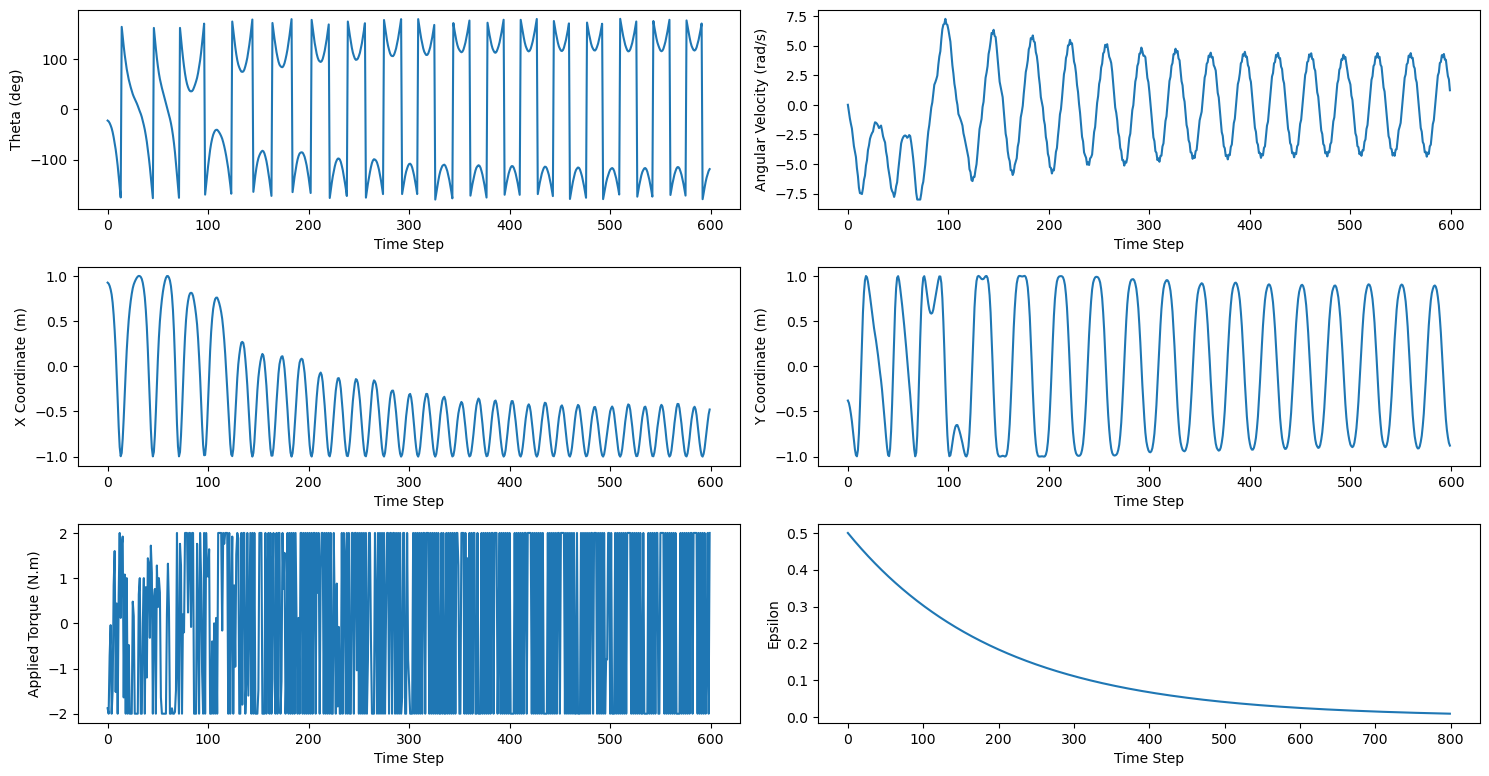

In [13]:
plt.figure(figsize=(15, 10))
i = np.argmax(np.mean(reward_values, axis=1)) # np.argmin(np.mean(reward_values, axis=1)) or -1 or any other value

plt.subplot(4,2,1)
plt.plot(th_values[i, :])
plt.xlabel('Time Step')
plt.ylabel('Theta (deg)')

plt.subplot(4,2,2)
plt.plot(th_dot_values[i, :])
plt.xlabel('Time Step')
plt.ylabel('Angular Velocity (rad/s)')

plt.subplot(4,2,3)
plt.plot(x_coordinate_values[i, :])
plt.xlabel('Time Step')
plt.ylabel('X Coordinate (m)')

plt.subplot(4,2,4)
plt.plot(y_coordinate_values[i, :])
plt.xlabel('Time Step')
plt.ylabel('Y Coordinate (m)')

plt.subplot(4,2,5)
plt.plot(action_values[i, :])
plt.xlabel('Time Step')
plt.ylabel('Applied Torque (N.m)')

plt.subplot(4,2,6)
eps = np.array([0.50*0.995**i for i in range(800)])
plt.plot(eps);
plt.xlabel('Time Step')
plt.ylabel('Epsilon')

plt.tight_layout()
plt.show()


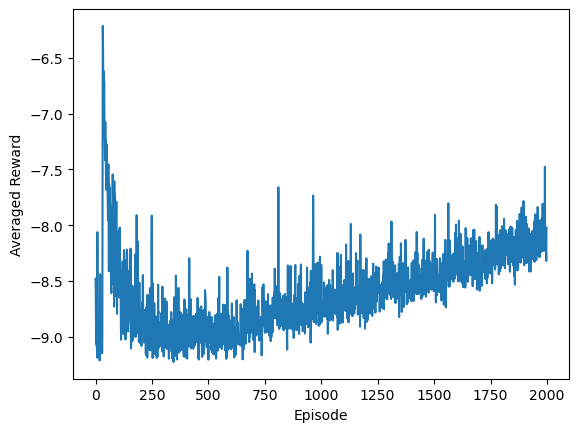

In [14]:
averaged_rewards = np.mean(reward_values, axis=1)
plt.plot(averaged_rewards[0: -1: 1]);
plt.xlabel('Episode')
plt.ylabel('Averaged Reward');

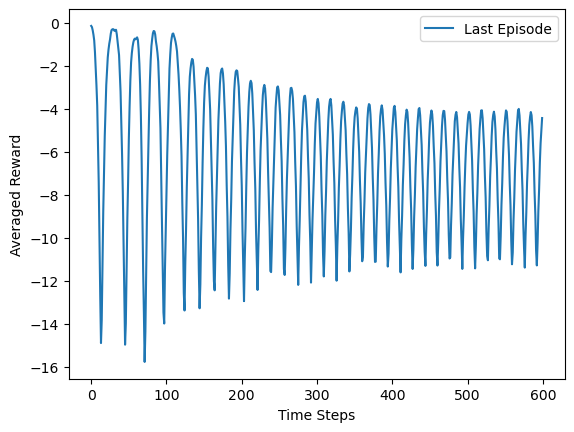

In [17]:
plt.plot(reward_values[i, :], label='Last Episode')
plt.xlabel('Time Steps')
plt.ylabel('Averaged Reward')
plt.legend()
plt.show()

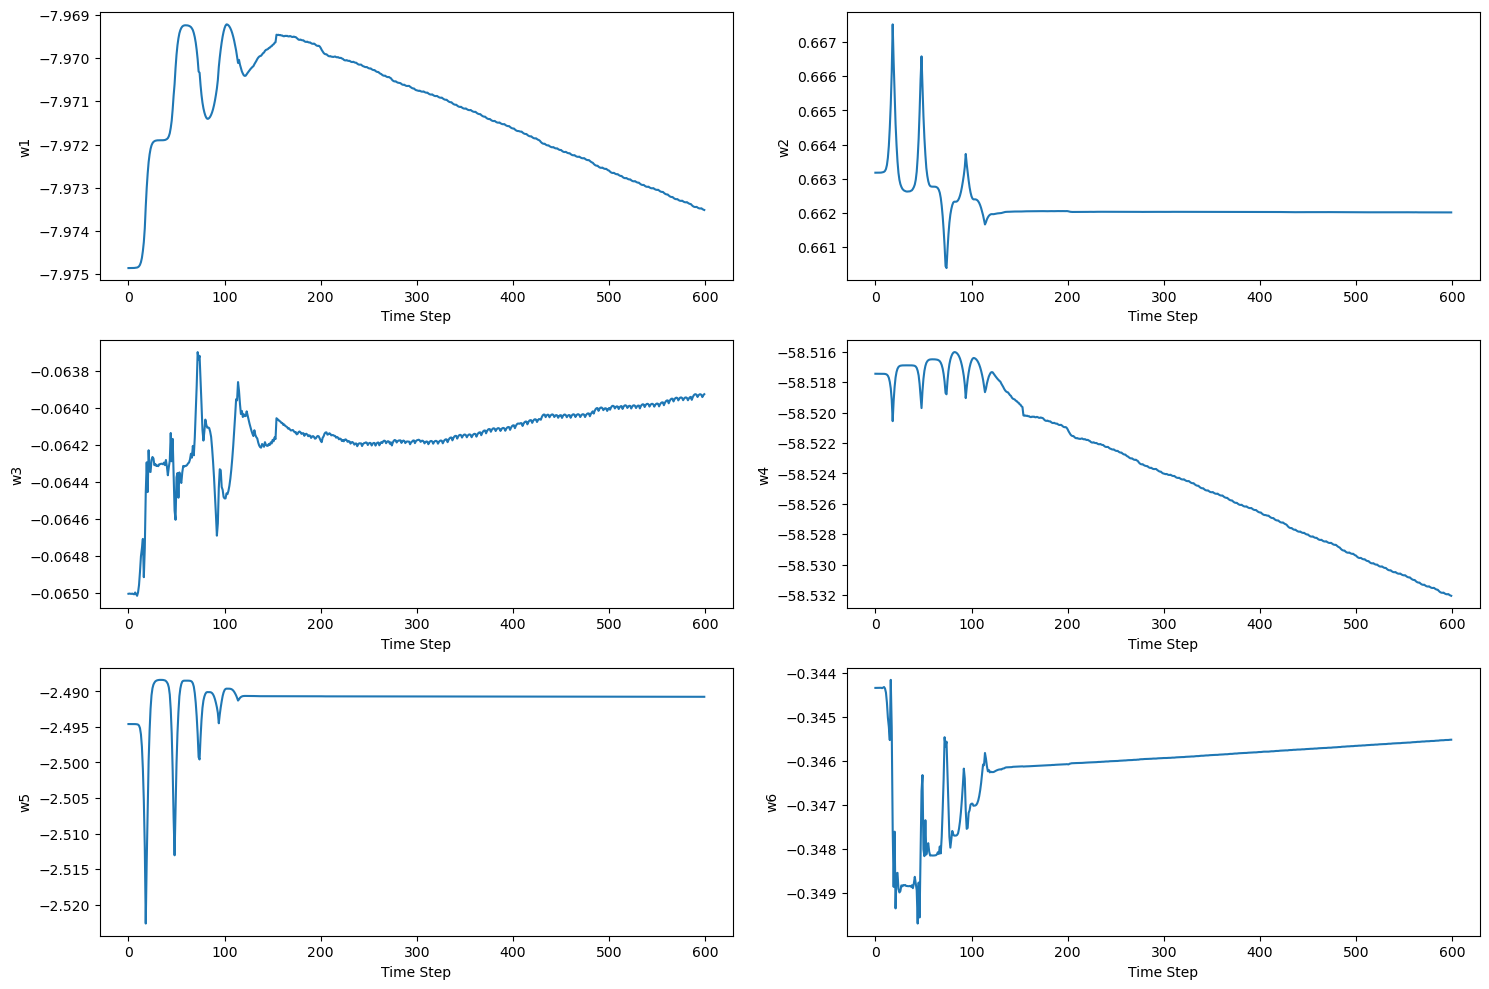

In [18]:
plt.figure(figsize=(15, 10))
e = -1

plt.subplot(3,2,1)
plt.plot(weight_values[e, :, 0])
plt.xlabel('Time Step')
plt.ylabel('w1')

plt.subplot(3,2,2)
plt.plot(weight_values[e, :, 1])
plt.xlabel('Time Step')
plt.ylabel('w2')

plt.subplot(3,2,3)
plt.plot(weight_values[e, :, 2])
plt.xlabel('Time Step')
plt.ylabel('w3')

plt.subplot(3,2,4)
plt.plot(weight_values[e, :, 3])
plt.xlabel('Time Step')
plt.ylabel('w4')

plt.subplot(3,2,5)
plt.plot(weight_values[e, :, 4])
plt.xlabel('Time Step')
plt.ylabel('w5')

plt.subplot(3,2,6)
plt.plot(weight_values[e, :, 5])
plt.xlabel('Time Step')
plt.ylabel('w6')

plt.tight_layout()

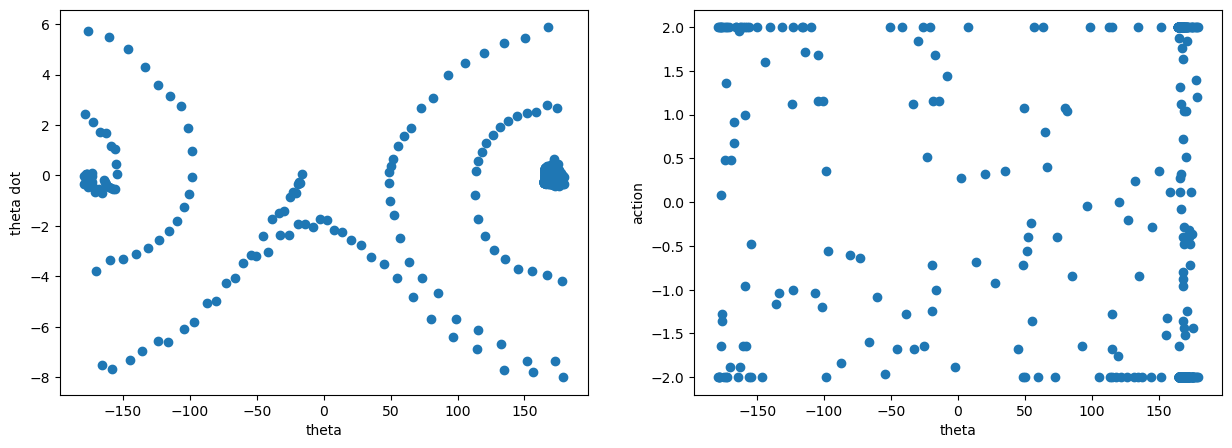

In [19]:
e = -1

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(th_values[e, :], th_dot_values[e, :])
plt.xlabel('theta')
plt.ylabel('theta dot');

plt.subplot(1, 2, 2)
plt.scatter(th_values[e, :], action_values[e, :])
plt.xlabel('theta')
plt.ylabel('action');